## Clustering analysis of RNA data

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
x_brca_train = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_train.pkl")
y_brca_train = x_brca_train["Ciriello_subtype"]
x_brca_train.drop(['tcga_id', 'Ciriello_subtype', 'sample_id', 'cancer_type'], axis="columns", inplace=True)

In [3]:
x_brca_train.head()

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,2.510456,0.028140,7.715284,1.461094,0.372293,0.225355,2.403970,0.061530,5.793350,6.960115,...,5.903705,6.487882,3.120146,4.879934,5.458410,3.337981,6.150583,4.955257,6.523552,6.331000
1,2.657545,0.131735,8.697799,6.334411,0.714290,0.028052,2.967353,0.006451,5.377308,5.430230,...,4.201788,5.843262,1.598004,3.150624,4.589208,3.475111,5.037776,7.627667,5.085828,5.159050
2,2.133521,0.031171,8.740598,5.763921,0.411263,0.000000,3.154296,0.093674,5.042371,5.085870,...,5.664298,6.181542,2.797198,4.219109,5.251486,4.131694,5.156545,7.888728,5.839178,6.057595
3,1.217436,0.012358,10.919038,0.135197,0.928360,0.068827,2.952245,0.037003,5.388060,5.766950,...,5.634331,6.951186,2.450123,4.331003,4.865360,3.480749,5.938206,9.086016,5.295436,5.737644
4,2.757098,0.006323,9.567252,5.861877,1.191594,0.006037,4.926423,0.084743,4.952008,5.014914,...,4.541370,4.869590,3.484438,4.865189,4.580591,2.871138,5.308459,7.627094,6.263564,5.998159


In [5]:
z = linkage(x_brca_train, 'single', 'correlation')
print('z has %d rows'%(z.shape[0]))

z has 816 rows


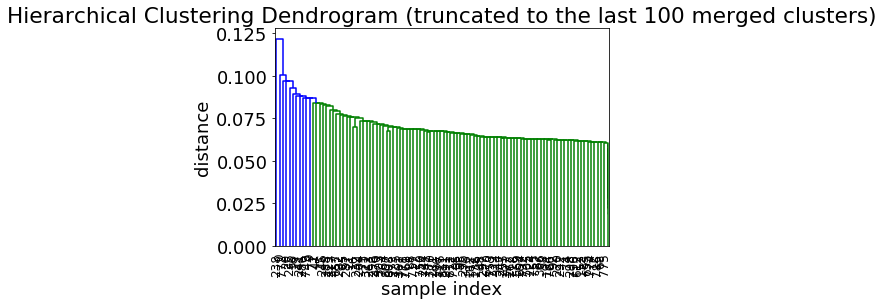

In [9]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 100 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()